<a href="https://colab.research.google.com/github/tylerwetrust/deep-learning/blob/main/lv5_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.datasets import boston_housing

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [12]:
train_data = pd.DataFrame(train_data)
train_targets = pd.DataFrame(train_targets)
test_data = pd.DataFrame(train_data)
test_targets = pd.DataFrame(train_targets)

          0     1      2    3       4   ...    8      9     10      11     12
0    1.23247   0.0   8.14  0.0  0.5380  ...   4.0  307.0  21.0  396.90  18.72
1    0.02177  82.5   2.03  0.0  0.4150  ...   2.0  348.0  14.7  395.38   3.11
2    4.89822   0.0  18.10  0.0  0.6310  ...  24.0  666.0  20.2  375.52   3.26
3    0.03961   0.0   5.19  0.0  0.5150  ...   5.0  224.0  20.2  396.90   8.01
4    3.69311   0.0  18.10  0.0  0.7130  ...  24.0  666.0  20.2  391.43  14.65
..       ...   ...    ...  ...     ...  ...   ...    ...   ...     ...    ...
399  0.21977   0.0   6.91  0.0  0.4480  ...   3.0  233.0  17.9  396.90  16.20
400  0.16211  20.0   6.96  0.0  0.4640  ...   3.0  223.0  18.6  396.90   6.59
401  0.03466  35.0   6.06  0.0  0.4379  ...   1.0  304.0  16.9  362.25   7.83
402  2.14918   0.0  19.58  0.0  0.8710  ...   5.0  403.0  14.7  261.95  15.79
403  0.01439  60.0   2.93  0.0  0.4010  ...   1.0  265.0  15.6  376.70   4.38

[404 rows x 13 columns]


In [13]:
train_data.max()

0      88.9762
1     100.0000
2      27.7400
3       1.0000
4       0.8710
5       8.7250
6     100.0000
7      10.7103
8      24.0000
9     711.0000
10     22.0000
11    396.9000
12     37.9700
dtype: float64

In [14]:
train_data.min()

0       0.00632
1       0.00000
2       0.46000
3       0.00000
4       0.38500
5       3.56100
6       2.90000
7       1.12960
8       1.00000
9     188.00000
10     12.60000
11      0.32000
12      1.73000
dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [30]:
def model_mreze():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  return model

In [32]:
model = model_mreze()
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [44]:
history = model.fit(train_data, train_targets, epochs=100, batch_size=1, validation_split
=0.1).history

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 5.7234 - mae: 1.6932 - val_loss: 5.8065 - val_mae: 2.0414
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 6.2100 - mae: 1.8045 - val_loss: 5.8027 - val_mae: 1.9257
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 5.2812 - mae: 1.6659 - val_loss: 4.7539 - val_mae: 1.7154
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 5.9127 - mae: 1.7110 - val_loss: 6.7755 - val_mae: 2.1575
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 5.2238 - mae: 1.6177 - val_loss: 5.5035 - val_mae: 1.9462
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 5.5372 - mae: 1.7249 - val_loss: 6.6777 - val_mae: 2.0993
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 5.0538 - mae: 1.6195 - val_loss: 4.8365 - val_mae: 1.7874
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - 

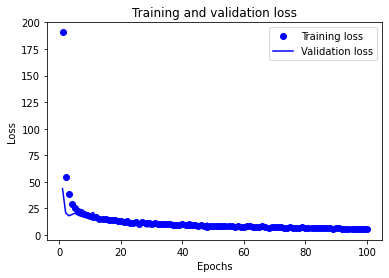

In [37]:
acc = history['mae']
loss_values = history['loss']
val_loss_values = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [40]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

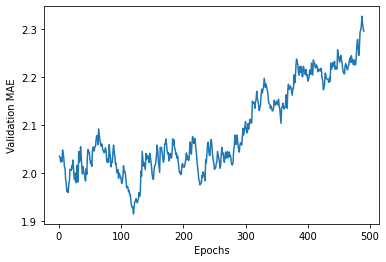

In [47]:
mae_history = history['val_mae']

smooth_mae_history = smooth_curve(mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [46]:
history = model.fit(train_data, train_targets, epochs=500, batch_size=1, validation_split
=0.1).history

Epoch 1/500
363/363 [==============================] - 1s 2ms/step - loss: 2.3040 - mae: 1.1574 - val_loss: 7.2917 - val_mae: 2.1268
Epoch 2/500
363/363 [==============================] - 1s 1ms/step - loss: 2.5729 - mae: 1.2110 - val_loss: 6.2848 - val_mae: 1.9507
Epoch 3/500
363/363 [==============================] - 1s 2ms/step - loss: 2.5680 - mae: 1.2068 - val_loss: 6.2859 - val_mae: 1.7907
Epoch 4/500
363/363 [==============================] - 1s 1ms/step - loss: 3.2119 - mae: 1.3099 - val_loss: 7.0550 - val_mae: 2.0995
Epoch 5/500
363/363 [==============================] - 0s 1ms/step - loss: 2.4836 - mae: 1.1599 - val_loss: 6.3014 - val_mae: 1.9024
Epoch 6/500
363/363 [==============================] - 1s 1ms/step - loss: 2.6295 - mae: 1.2034 - val_loss: 8.3727 - val_mae: 2.1339
Epoch 7/500
363/363 [==============================] - 1s 2ms/step - loss: 2.3748 - mae: 1.1385 - val_loss: 6.4072 - val_mae: 1.8521
Epoch 8/500
363/363 [==============================] - 1s 2ms/step - 

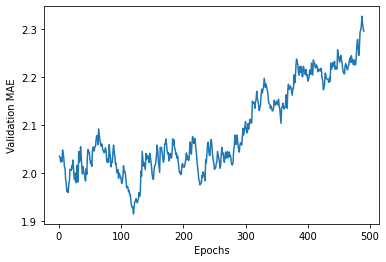

In [49]:
mae_history = history['val_mae']

smooth_mae_history = smooth_curve(mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [50]:
model.evaluate(test_data,test_targets)

13/13 [==============================] - 0s 2ms/step - loss: 13777717.0000 - mae: 3500.4407


[13777717.0, 3500.440673828125]